In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

In [6]:
# Create a DataFrame with the scaled data

df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Extract 'coin_id' column to set it as the index later
coin_ids = df_market_data.index

# Select only the numeric columns for scaling
numeric_columns = df_market_data.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Copy the crypto names from the original data

df_market_data_scaled = df_market_data.copy()
df_market_data_scaled[numeric_columns] = scaler.fit_transform(df_market_data[numeric_columns])

# Set the coinid column as index

df_market_data_scaled.index = coin_ids

# Display sample data

print(df_market_data_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans_model.fit(df_market_data_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia_values)

C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.302379141625, 54.73992194210021, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


In [9]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [10]:
# Create a dictionary with the data
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data
df_elbow_curve = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow_curve)

    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


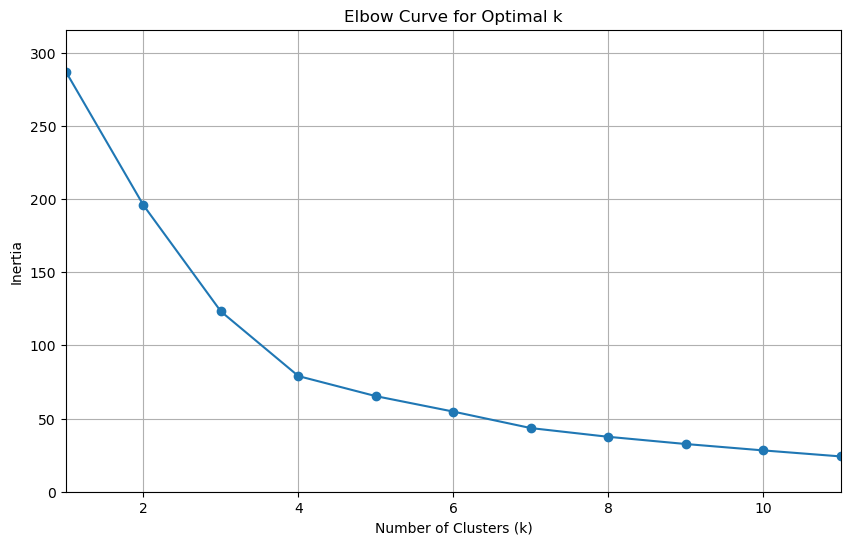

In [11]:
import matplotlib.pyplot as plt

# Plotting the Elbow curve with manually set axis limits
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_curve['k_values'], df_elbow_curve['inertia_values'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Manually set the axis limits
plt.xlim(1, 11)  # Set x-axis limits from 1 to 11
plt.ylim(0, max(df_elbow_curve['inertia_values']) * 1.1)  # Set y-axis limits based on the maximum inertia value

plt.grid(True)
plt.show()



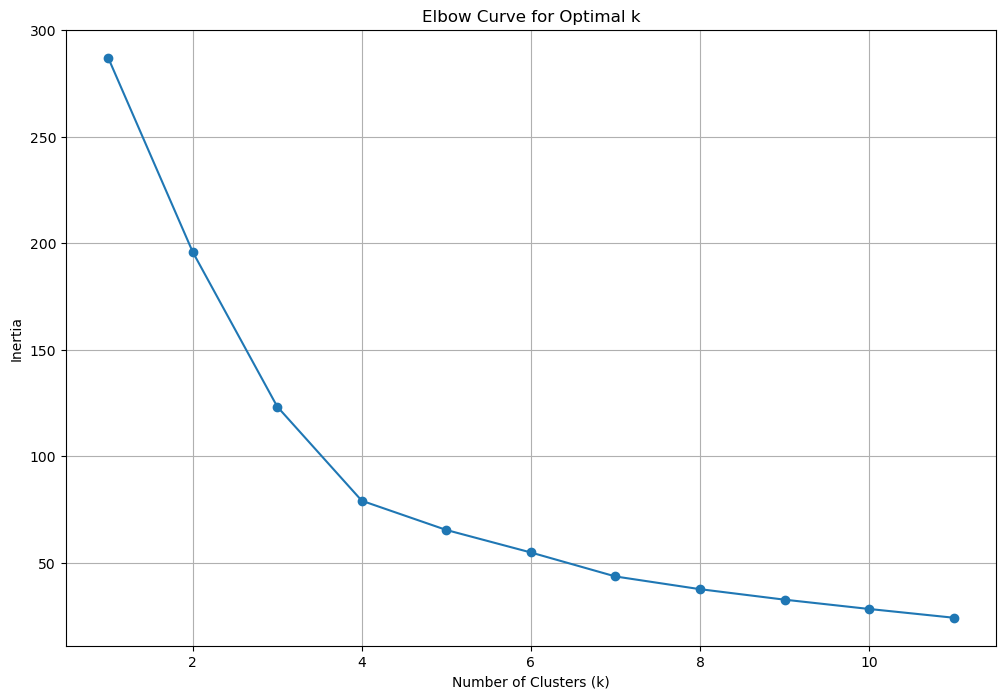

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plotting the Elbow curve
plt.figure(figsize=(12, 8))
plt.plot(df_elbow_curve['k_values'], df_elbow_curve['inertia_values'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

# 11 as this is the total k values

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialise the K-Means model using the best value for k

from sklearn.cluster import KMeans

# Optimal value for k (replace with the actual optimal value from the Elbow curve)
optimal_k = 4

# Initialize the KMeans model with the optimal value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the scaled data
kmeans_model.fit(df_market_data_scaled)

# Get the labels assigned to each data point
labels = kmeans_model.labels_

# Add the labels as a new column in the original DataFrame
df_market_data['cluster_label'] = labels

# Display the DataFrame with cluster labels
print(df_market_data.head())


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [15]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [17]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

# Display the first few rows of the copied DataFrame
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [18]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = predicted_clusters

# Display sample data with the new column
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


In [20]:
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='predicted_cluster',  # Use the predicted clusters for coloring
    cmap='viridis',  # Set the colormap (you can choose another one)
    hover_cols=['coin_id'],  # Add crypto name in hover information
    title='Scatter Plot of Cryptocurrencies',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    width=800,
    height=500
)

# Show the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [21]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)



In [22]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_result = pca_model.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA results
df_pca_result = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# Display the first five rows of the DataFrame with PCA results
print(df_pca_result.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f'Explained Variance for PC{i + 1}: {variance:.4f}')



Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [24]:
# Calculate the total explained variance of the three principal components
total_explained_variance = sum(pca_model.explained_variance_ratio_)

# Display the total explained variance
print(f'Total Explained Variance of the Three Principal Components: {total_explained_variance:.4f}')

Total Explained Variance of the Three Principal Components: 0.8950


In [25]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

In [26]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index  # 'coin_id' is already the index

# Display sample data
print(df_pca.head())


                   PC1       PC2       PC3       coin_id
coin_id                                                 
bitcoin      -0.600667  0.842760  0.461595       bitcoin
ethereum     -0.458261  0.458466  0.952877      ethereum
tether       -0.433070 -0.168126 -0.641752        tether
ripple       -0.471835 -0.222660 -0.479053        ripple
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [28]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [29]:
# Create an empty list to store inertia values
inertia_values = []

# Create a for loop to compute the inertia for each value of k
for k in k_values:
    # Create a KMeans model using the current value of k
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data, excluding the 'coin_id' column
    kmeans_model.fit(df_pca.drop('coin_id', axis=1))
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia_values)


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[256.8740855678925, 165.90199402036015, 93.77462568057308, 49.6654966517974, 37.83946598681246, 30.777746141441202, 21.134056037473627, 17.09163664386476, 13.681139692992758, 10.630647573870975, 8.1286203202135]


In [30]:
# Create a dictionary with the data for plotting the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data for plotting the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)


    k_values  inertia_values
0          1      256.874086
1          2      165.901994
2          3       93.774626
3          4       49.665497
4          5       37.839466
5          6       30.777746
6          7       21.134056
7          8       17.091637
8          9       13.681140
9         10       10.630648
10        11        8.128620


In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import hvplot.pandas

df_elbow.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve', xlabel='Number of Clusters (k)', ylabel='Inertia')


:Curve   [k_values]   (inertia_values)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialise the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Best value for k obtained from the Elbow curve
best_k = 4

# Initialize the K-Means model with the best value for k
best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [33]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(df_pca.drop('coin_id', axis=1))  # Exclude the 'coin_id' column

# Access the cluster labels assigned to each data point
cluster_labels = best_kmeans_model.labels_

# Print the resulting array of cluster values
print(cluster_labels)


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [34]:
# Predict the clusters using the PCA data
predicted_clusters = best_kmeans_model.predict(df_pca.drop('coin_id', axis=1))  # Exclude the 'coin_id' column

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [35]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column with the predicted clusters
df_pca_copy['predicted_cluster'] = predicted_clusters

# Display sample data
print(df_pca_copy.head())


                   PC1       PC2       PC3       coin_id  predicted_cluster
coin_id                                                                    
bitcoin      -0.600667  0.842760  0.461595       bitcoin                  0
ethereum     -0.458261  0.458466  0.952877      ethereum                  0
tether       -0.433070 -0.168126 -0.641752        tether                  2
ripple       -0.471835 -0.222660 -0.479053        ripple                  2
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash                  0


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


In [37]:
import hvplot.pandas

# Scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='predicted_cluster',
    cmap='viridis',  # You can choose a different colormap if desired
    title='Scatter Plot of PC1 vs PC2 with Predicted Clusters',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    hover_cols=['coin_id'],
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [38]:
# Composite plot to contrast the Elbow curves
# Assuming you have computed and stored Elbow curves for the original data in df_elbow

# Elbow curve for the original data
elbow_curve_original = df_elbow.hvplot.line(x='k_values', y='inertia_values', label='Original Data', color='blue')

# Customize the plot
elbow_curve_original.opts(
    title='Elbow Curve for Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

:Curve   [k_values]   (inertia_values)

In [40]:
# Composite plot to contrast the clusters
import hvplot.pandas

# Assuming you have computed and stored clusters in df_market_data with a 'cluster_label' column
scatter_original = df_market_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster_label',
    colormap='viridis',
    hover_cols=['coin_id'],
    width=800,
    height=400,
)

# Assuming you have computed and stored clusters in df_pca_result with a 'cluster_label' column
scatter_pca = df_pca_result.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster_label',
    colormap='viridis',
    hover_cols=['coin_id'],
    width=800,
    height=400,
)

# Create a composite plot
composite_clusters_plot = scatter_original * scatter_pca

# Display the plot
composite_clusters_plot



:Overlay
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster_label,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The data looks a lot more clustered together and more towards the original 0. values seen right at the start of the clustering